# Import

In [60]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tight_subplot as ts
import nonmax as nm
import numpy as np

# Problem 1: Image Pyramids

Load the provided image “texture.jpeg” and convert it to grayscale. Write code for a Gaussian and Laplacian pyramid of 5 levels (use for loops). At each level, the resolution should be reduced by a factor of 2. Show your pyramids and include the code in your submission.

483 743


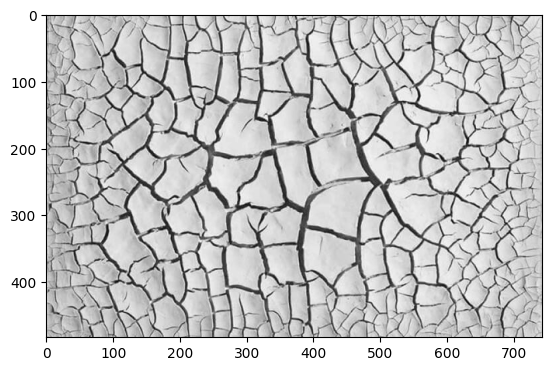

In [20]:
# Convert to gray scale
texture_img = cv2.imread('texture.jpeg')
texture_img_yuv = cv2.cvtColor(texture_img, cv2.COLOR_BGR2YUV)
texture_y, texture_u, texture_v = cv2.split(texture_img_yuv)
# display the Y component in notebook
plt.imshow(texture_y, cmap='gray')
X, Y, Z = texture_img.shape
print(X, Y)

## Part 1: 
Display a Gaussian and Laplacian pyramid of level 5 (write your code). It should be formatted
similarly to Figure 1 above. You may find the included “tight_subplot.py” helpful for making plots.

### Gaussian and Laplacian Pyramid

In [21]:
# downsampling rate is 2
# so sigma = sqrt(2/2) = 1
gaussian_images = []
laplacian_images = []
gaussian_kernel = cv2.getGaussianKernel(3, 1)
prefilter_y = texture_y
for i in range(5):
    # filter
    filtered_y = cv2.filter2D(prefilter_y, -1, gaussian_kernel)
    gaussian_images.append(filtered_y)
    # compute residual
    residual = prefilter_y - filtered_y
    laplacian_images.append(residual)
    # downsample filtered image
    downsampled_y = cv2.resize(filtered_y, (0, 0), fx=0.5, fy=0.5)
    prefilter_y = downsampled_y


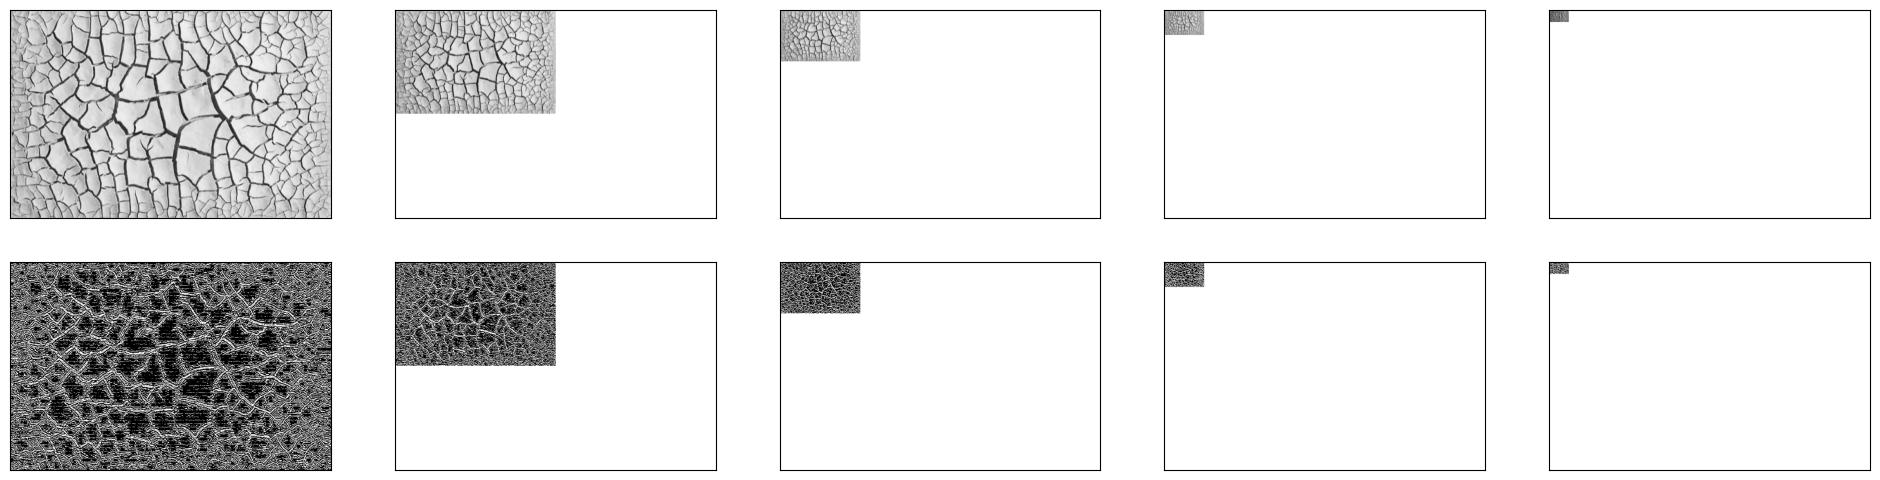

In [22]:
# Display Pyramid
padded_gaussian_images = []
padded_laplacian_images = []
for i in range(5):
    gaussian_image = gaussian_images[i]
    laplacian_image = laplacian_images[i]

    pad_right = Y - gaussian_image.shape[1]
    pad_bottom = X - gaussian_image.shape[0]
    padded_gaussian_image = cv2.copyMakeBorder(gaussian_image, 0, pad_bottom, 0, pad_right, cv2.BORDER_CONSTANT, value=[255, 255, 255])
    padded_gaussian_images.append(padded_gaussian_image)

    pad_right = Y - laplacian_image.shape[1]
    pad_bottom = X - laplacian_image.shape[0]
    padded_laplacian_image = cv2.copyMakeBorder(laplacian_image, 0, pad_bottom, 0, pad_right, cv2.BORDER_CONSTANT, value=[255, 255, 255])
    padded_laplacian_images.append(padded_laplacian_image)

ts.tight_subplot_2x5(padded_gaussian_images, padded_laplacian_images)


## Part 2: 
Display the FFT amplitudes of your Gaussian/Laplacian pyramids. Appropriate display ranges ("vmin", "vmax") should be chosen so that frequencies in different pyramid levels are clearly visible. Explain what the Laplacian and Gaussian pyramids are doing in terms of frequency.

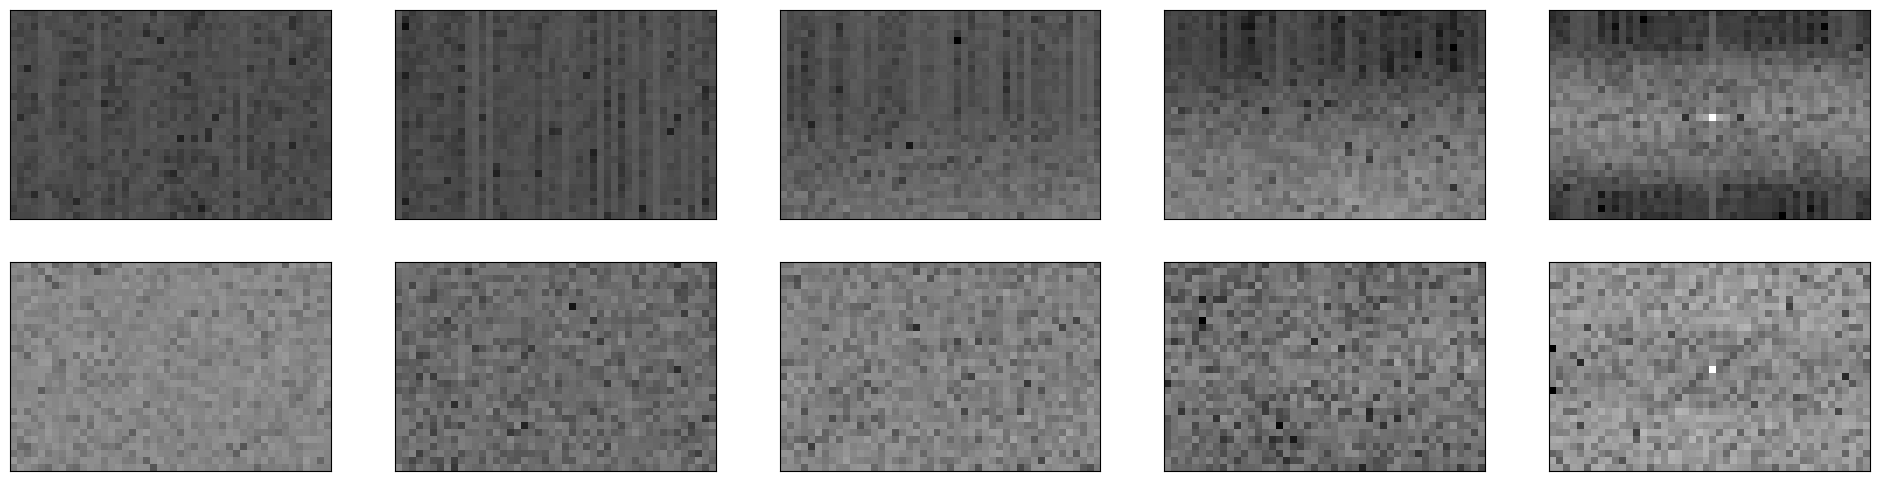

In [27]:
fft_gaussian_images = []
fft_laplacian_images = []

for i in range(5):
    fft_gaussian_image = np.fft.fft2(gaussian_images[i])
    fft_shift_gaussian_image = np.fft.fftshift(fft_gaussian_image)
    magnitude_spectrum_gaussian = 20 * np.log(np.abs(fft_shift_gaussian_image))
    fft_gaussian_images.append(magnitude_spectrum_gaussian)

    fft_laplacian_image = np.fft.fft2(laplacian_images[i])
    fft_shift_laplacian_image = np.fft.fftshift(fft_laplacian_image)
    magnitude_spectrum_laplacian = 20 * np.log(np.abs(fft_shift_laplacian_image))
    fft_laplacian_images.append(magnitude_spectrum_laplacian)

ts.tight_subplot_2x5(fft_gaussian_images, fft_laplacian_images)


# Problem 2: Edge Detection

In this problem, we will detect the edges of the provided image "plane.jpg".

## Part 1: Build a simple gradient-based edge detector that includes the following functions
Complete two functions below, and visualize your detected edges.


1. `def gradientMagnitude(im: np.ndarray, sigma: float): return mag: np.ndarray, theta: np.ndarray`

This function should take an RGB image as input, smooth the image with a Gaussian filter (std=sigma),
compute the x and y gradient values of the smoothed image, and output image maps of the gradient
magnitude and orientation at each pixel. You can compute the gradient magnitude of an RGB image by
taking the L2-norm of the R, G, and B gradients. The orientation can be computed from the channel
corresponding to the largest gradient magnitude. The overall gradient magnitude is the L2-norm of the x
and y gradients. mag and theta should be the same size as im.

2. `def edgeGradient(im: np.ndarray): return bmap: np.ndarray`

This function should use gradientMagnitude to compute a soft boundary map and then perform
non-maxima suppression. You could use the provided nonmax.py.
Useful functions include: cv2.getGaussianKernel, cv2.filter2D, cv2.spatialGradient, np.take_along_axis

In [65]:
def gradientMagnitude(im: np.ndarray, sigma: float):
    # return mag: np.ndarray, theta: np.ndarray
    # img is a RGB image
    # compute the gradients x and y gradients for each R, G, and B

    # smooth image first
    im = cv2.GaussianBlur(im, (3, 3), sigma)
    
    red_channel = im[:, :, 0]
    green_channel = im[:, :, 1]
    blue_channel = im[:, :, 2]

    # sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -11]])
    # sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    # red_x_gradient = cv2.filter2D(red_channel, -1, sobel_x)
    # red_y_gradient = cv2.filter2D(red_channel, -1, sobel_y)

    # green_x_gradient = cv2.filter2D(green_channel, -1, sobel_x)
    # green_y_gradient = cv2.filter2D(green_channel, -1, sobel_y)

    # blue_x_gradient = cv2.filter2D(blue_channel, -1, sobel_x)
    # blue_y_gradient = cv2.filter2D(blue_channel, -1, sobel_y)

    red_x_gradient, red_y_gradient = cv2.spatialGradient(red_channel, dx=1, dy=1)

    green_x_gradient, green_y_gradient = cv2.spatialGradient(green_channel, dx=1, dy=1)

    blue_x_gradient, blue_y_gradient = cv2.spatialGradient(blue_channel, dx=1, dy=1)

    # compute the gradient magnitude and direction
    magnitude = np.sqrt(red_x_gradient**2 + red_y_gradient**2 + green_x_gradient**2 + green_y_gradient**2 + blue_x_gradient**2 + blue_y_gradient**2)
    theta = np.arctan2(red_y_gradient + green_y_gradient + blue_y_gradient, red_x_gradient + green_x_gradient + blue_x_gradient)

    return magnitude, theta

In [66]:
def edgeGradient(im: np.ndarray):
    # return bmap: np.ndarray
    magnitude, theta = gradientMagnitude(im, 1)
    non_maxima_suppressed_edge = nm.non_max_suppression(magnitude, theta)
    return non_maxima_suppressed_edge

(321, 481, 3)


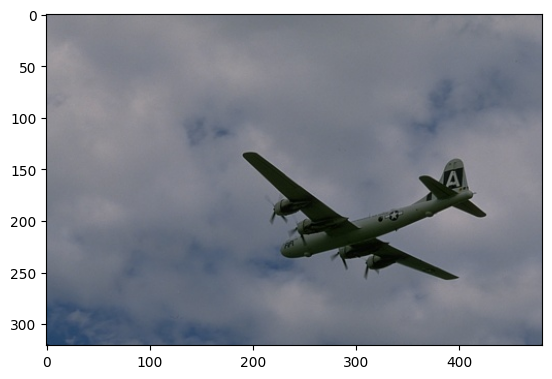

In [72]:
# Test Code
img = Image.open('plane.jpg')
img = np.array(img)
print(img.shape)
plt.imshow(img)

C:\Users\patel\AppData\Local\Temp\ipykernel_19660\1985144802.py:32: RuntimeWarning: invalid value encountered in sqrt
  magnitude = np.sqrt(red_x_gradient**2 + red_y_gradient**2 + green_x_gradient**2 + green_y_gradient**2 + blue_x_gradient**2 + blue_y_gradient**2)


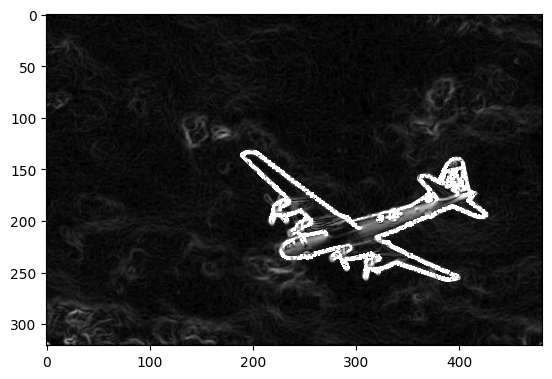

In [73]:
magnitude, theta = gradientMagnitude(img, 1)
plt.imshow(magnitude, cmap='gray')

C:\Users\patel\AppData\Local\Temp\ipykernel_19660\1985144802.py:32: RuntimeWarning: invalid value encountered in sqrt
  magnitude = np.sqrt(red_x_gradient**2 + red_y_gradient**2 + green_x_gradient**2 + green_y_gradient**2 + blue_x_gradient**2 + blue_y_gradient**2)


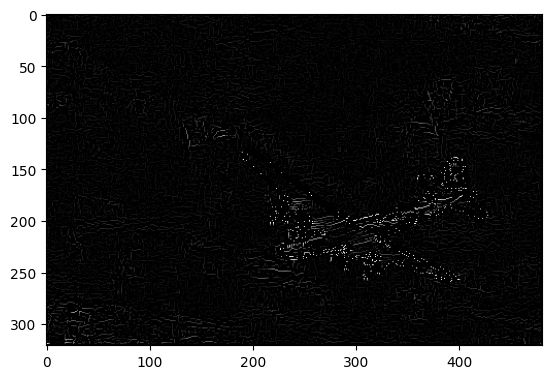

In [74]:
thin_edge = edgeGradient(img)
plt.imshow(thin_edge, cmap='gray')